In [257]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import cv2

In [258]:
def GetIntensityCounts(frame, threshold):
    """Input:
    frame: ndarray of pixels (image file or video frame)
    threshold: minimum brightness for an event detection
    
    Output: an ndarray of boolean values describing which
    pixels were above the brightness threshold in the frame
    """
    # Generating empty matrix for coordinate assignment   
    intensity = np.zeros((len(frame), len(frame)))
    # Generating index lists to keep track of coordinates
    index_count_row = []
    index_count_col = []
    
    # Looks through matrix for points above a brightness threshold
   
    # Finding coordinates of brightness events
    row, col = np.where(frame >= threshold)
    for i in range(len(row)):
        for j in range(len(col)):
            # Adds up value of intensity in the position of
            # the given brightness event
            # draw the box of the ROI
            roi = edge[i:i,j:j]
            intensity[i, j] = np.mean(roi)
            index_count_row.append(row[i])
            index_count_col.append(col[i])
    return intensity

In [259]:
def GetIntensityArray(videofile):
    """
    Input:
    -videofile: file containing an image stack of fluorescent events
    Output: 2-d Array of frequency values for each pixel above
    a calculated brightness threshold in the video
    """
    # Reading video file and convert to grayscale images
    ret, img = cv2.imreadmulti(videofile, flags=cv2.IMREAD_GRAYSCALE)
    # Creating empty array to add up intensities
    intensity_array = np.zeros(np.shape(img[0]))
    print (np.shape(img[0]))
    # Looking through each frame to get the intensity
    for frame in range(len(img)):
        # Setting threshold using mean and stdev of pixel brightness
        #mean = np.mean(img[frame])
        #std = np.std(img[frame])
        #threshold = mean + 3*std
        
        ret, threshold = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
        edge = cv2.Canny(threshold, 50,100)
        
        
        intensity = GetIntensityCounts(img[frame], threshold)
        
        if len(np.where(intensity == 1)) > 0:
            # Get coordinates of the single pixel counts
            row, col = np.where(intensity == 1)
            for i in range(len(row)):
                for j in range(len(col)):
                    # find mean intensity of the boxed ROI
                    #roi_avg_intensity = np.mean(roi_gray)
                    roi = edge[i:i+1,j:j+1]
                    print (roi)
                    intensity[i, j] = np.mean(roi)
                    # Add single count to intensity_array in location of event
                    intensity_array[row[i], col[j]] += np.mean(roi)
        else:
            pass
    return intensity_array


In [260]:
GetIntensityArray('NP_test1.tif')

(512, 512)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [261]:
def Heatmap(videofile, img_path, img_name):
    # Reading video file
    ret, img = cv2.imreadmulti(videofile, flags=cv2.IMREAD_GRAYSCALE)
    # obtaining frequency array
    z = GetIntensityArray(videofile)
    # Generating x and y axes in shape of image frame
    pixel_X = np.arange(0, len(img[0]), 1)
    pixel_Y = np.arange(0, len(img[0]), 1)
    # Mapping frequency array onto the x and y axes
    fig = plt.pcolormesh(pixel_X, pixel_Y, z, cmap='plasma')
    plt.xlabel('Pixel Count')
    plt.ylabel('Pixel Count')
    plt.title('Intensity Heat Map')
    # picture is saved in file location designated by user
    plt.savefig(img_path + '/' + img_name + '.png', bbox_inches='tight')
    return fig

(512, 512)


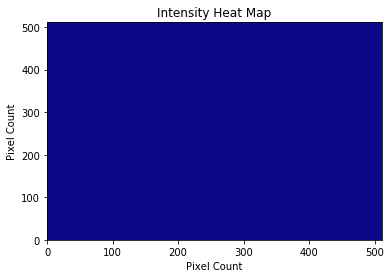

In [262]:
Heatmap('NP_test1.tif', '/Users/julyzhou/Desktop/DIRECT', 'Intensity_acc_map')